In [8]:
# Load the saved model
from tensorflow.keras.models import load_model
import pickle

# Load the model (either HDF5 or Keras format)
model_h5 = load_model('/content/drive/MyDrive/saved_data/covid19_vgg19_model.h5')
print("Model loaded from 'my_model.h5'.")

# model_keras = load_model('my_model.keras')
# print("Model loaded from 'my_model.keras'.")

# Load the training history
with open('/content/drive/MyDrive/saved_data/covid19_vgg19_model.pkl', 'rb') as f:
    loaded_history = pickle.load(f)
print("Training history loaded successfully form 'training_history.pkl'.")

Model loaded from 'my_model.h5'.
Training history loaded successfully form 'training_history.pkl'.


In [9]:
def scalar(img):
    return img

# Prepare the New Data

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming `new_data_dir` contains the validation/test dataset
new_data_dir = '/content/drive/MyDrive/saved_data/test_gen'

datagen = ImageDataGenerator(preprocessing_function=scalar)  # Normalize images

# Correct the data generator
new_data_generator = datagen.flow_from_directory(
    new_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    # shuffle=False  # Important for consistency in predictions and labels
)

# # Ensure the model uses the correct loss function
# model_keras.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
#     metrics=['accuracy']
# )

model_h5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)


Found 2117 images belonging to 4 classes.


In [10]:
# Evaluate the model on new data
results_h5 = model_h5.evaluate(new_data_generator)
print(f"Evaluation results (HDF5): Loss = {results_h5[0]}, Accuracy = {results_h5[1]}")



/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 0.9669 - loss: 0.0930
Evaluation results (HDF5): Loss = 0.09031292051076889, Accuracy = 0.9659895896911621


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


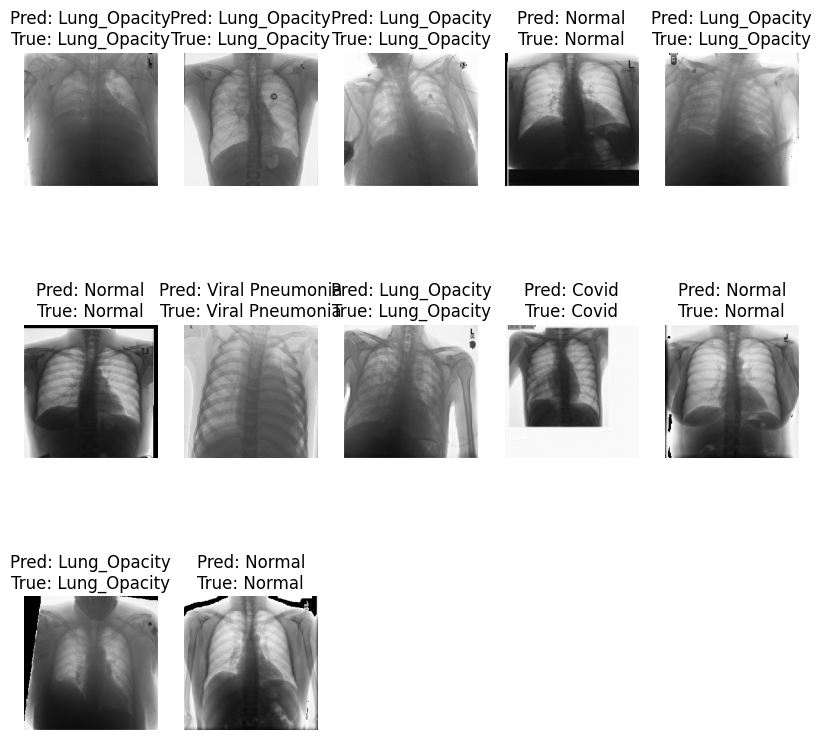

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
image_batch, label_batch = next(new_data_generator)

# Predict using the model
predictions = model_h5.predict(image_batch)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names (assuming the generator provides them)
class_names = list(new_data_generator.class_indices.keys())

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(12):  # Show 12 images
    ax = plt.subplot(3, 5, i + 1)
    # Correcting the image display by scaling it back to [0, 255]
    plt.imshow((image_batch[i] * 255).astype("uint8"))
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[np.argmax(label_batch[i])]}")  # One-hot to index
    plt.axis("off")
plt.show()

Found 2117 images belonging to 4 classes.


67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       362
           1       0.98      0.91      0.94       602
           2       0.95      0.99      0.97      1019
           3       0.96      0.99      0.98       134

    accuracy                           0.97      2117
   macro avg       0.97      0.97      0.97      2117
weighted avg       0.97      0.97      0.97      2117



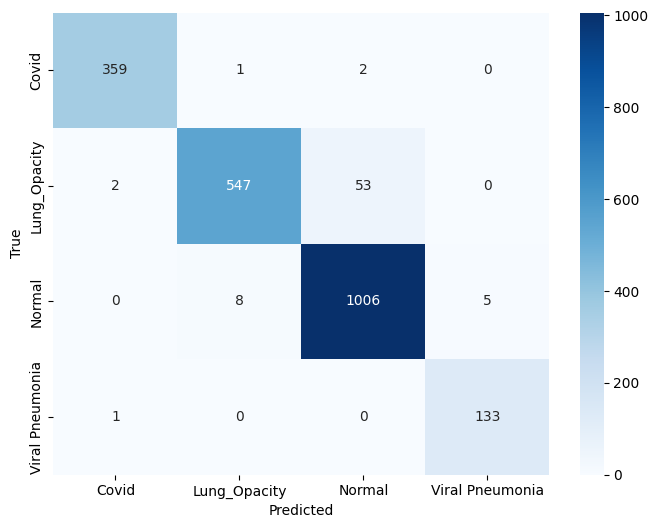

In [12]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

new_data_generator = datagen.flow_from_directory(
    new_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for consistency in predictions and labels
)

# Display confusion matrix and classification report
y_pred = model_h5.predict(new_data_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = new_data_generator.classes

print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=new_data_generator.class_indices, yticklabels=new_data_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
from tensorflow.keras.models import load_model  # Correct import for Keras models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 1. Load the saved model
model = load_model('/content/drive/MyDrive/saved_data/covid19_vgg19_model.h5')

# 2. Load the image and preprocess it
img_path = '/content/Lung_Opacity-415.png'  # Replace with your image path
img = load_img(img_path, target_size=(224, 224))  # Resize to the input size of the model
img_array = img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# Do not scale the image, since training used `scalar(img)` function
img_array = img_array  # Preprocessing step matches training

# 3. Make predictions
predictions = model.predict(img_array)

# 4. Get the predicted class
predicted_class = np.argmax(predictions, axis=-1)  # Get the index of the highest probability
confidence = np.max(predictions)  # Get the confidence of the prediction (probability)
class_labels = list(new_data_generator.class_indices.keys())  # Ensure class order is consistent
predicted_class_name = class_labels[predicted_class[0]]  # Get the predicted class name

print(f"Predicted class: {predicted_class_name}")
print(f"Confidence (accuracy): {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
Predicted class: Lung_Opacity
Confidence (accuracy): 99.98%


In [31]:
print("Class Indices Mapping:")
print(new_data_generator.class_indices)

Class Indices Mapping:
{'Covid': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


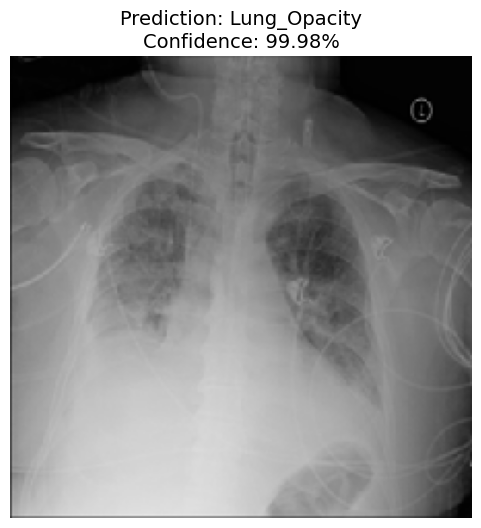

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the saved model
model = load_model('/content/drive/MyDrive/saved_data/covid19_vgg19_model.h5')

# 2. Load the image and preprocess it
img_path = '/content/Lung_Opacity-415.png'  # Replace with your image path
img = load_img(img_path, target_size=(224, 224))  # Resize to the input size of the model
img_array = img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Do not scale the image since the training used `scalar(img)` function
img_array = img_array

# 3. Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)  # Get the index of the highest probability
confidence = np.max(predictions)  # Get the confidence of the prediction (probability)

# 4. Class labels
class_labels = ['Covid', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
predicted_class_name = class_labels[predicted_class[0]]

# 5. Visualize the input image with prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)  # Display the original image
plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence * 100:.2f}%", fontsize=14)
plt.axis('off')  # Remove axes for better display
plt.show()